<img src='https://user-images.githubusercontent.com/6457691/90080969-0f758d00-dd47-11ea-8191-fa12fd2054a7.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 4 / SPRINT 1 / NOTE 1 - assignmnet*

---





# N411. 퍼셉트론(Perceptron)과 인공신경망(Artificial Neural Networks) 과제

## 단층 퍼셉트론

이진분류 태스크를 위한 예시 데이터를 생성해보겠습니다. X 데이터는 (x좌표, y좌표)로 이루어져 있으며, 타겟 데이터는 0과 1로 이루어져 있습니다.

아래의 예시 생성 부분이 당장 이해 안가도 괜찮습니다. 넘파이를 활용해, 이런 다양한 일들을 할 수 있다는 점을 알아두시고, 궁금하신 분은 나중에 더 찾아보세요.

- np.append, np.vstack, np.hstack의 각각의 차이점에 대해 더 찾아보세요!

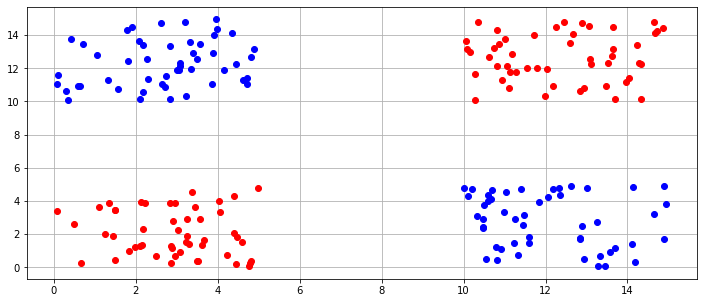

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

x11 = np.random.uniform(low=0, high=5, size=(50,))
x12 = np.random.uniform(low=10, high=15, size=(50,))
x21 = np.random.uniform(low=0, high=5, size=(50,))
x22 = np.random.uniform(low=10, high=15, size=(50,))


x1 = np.append(x11, x12)
x2 = np.append(x21, x22)

y11 = np.random.uniform(low=10, high=15, size=(50,))
y12 = np.random.uniform(low=0, high=5, size=(50,))
y21 = np.random.uniform(low=0, high=5, size=(50,))
y22 = np.random.uniform(low=10, high=15, size=(50,))

y1 = np.append(y11, y12)
y2 = np.append(y21, y22)

x_1 = np.vstack([x1, y1]).T
x_2 = np.vstack([x2, y2]).T
y_1 = np.ones_like(x_1[:, 0])
y_2 = np.zeros_like(x_2[:, 0])
x = np.vstack([x_1, x_2])
y = np.hstack([y_1, y_2])


fig, ax = plt.subplots(figsize = (12,5))
ax.plot(x_1[:, 0], x_1[:,1], 'bo')
ax.plot(x_2[:,0], x_2[:,1], 'ro')
ax.grid()

### 문제 1-1

단층 퍼셉트론으로 위의 문제를 해결할 수 없음을 확인해보겠습니다. 이진 분류를 위한 단층 퍼셉트론을 구현하기 위해 다음 빈칸에 들어갈 내용으로 알맞은 것은?

Epoch 1/10
7/7 [==============================] - 1s 2ms/step - loss: 2.8680 - accuracy: 0.7050
Epoch 2/10
7/7 [==============================] - 0s 2ms/step - loss: 2.3929 - accuracy: 0.6750
Epoch 3/10
7/7 [==============================] - 0s 2ms/step - loss: 2.0681 - accuracy: 0.5700
Epoch 4/10
7/7 [==============================] - 0s 2ms/step - loss: 1.8447 - accuracy: 0.5800
Epoch 5/10
7/7 [==============================] - 0s 2ms/step - loss: 1.6560 - accuracy: 0.6000
Epoch 6/10
7/7 [==============================] - 0s 2ms/step - loss: 1.4328 - accuracy: 0.5500
Epoch 7/10
7/7 [==============================] - 0s 3ms/step - loss: 1.2386 - accuracy: 0.5350
Epoch 8/10
7/7 [==============================] - 0s 2ms/step - loss: 1.0882 - accuracy: 0.5300
Epoch 9/10
7/7 [==============================] - 0s 3ms/step - loss: 0.9427 - accuracy: 0.6250
Epoch 10/10
7/7 [==============================] - 0s 3ms/step - loss: 0.8321 - accuracy: 0.5500


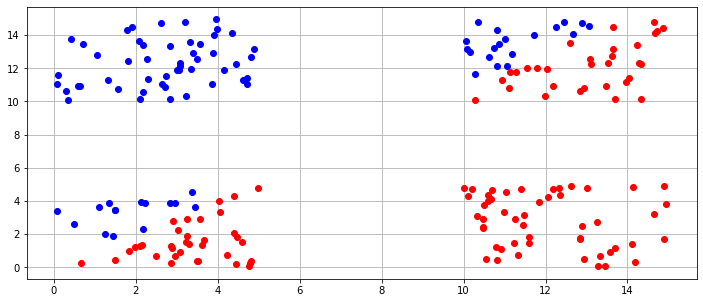

In [3]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x, y, epochs=10)

# 각각의 변수 명을 모두 다르게 설정했습니다.
# model.predict의 결과값 / preds_1d / pred_class 의 형태(shape)와 값들을 한번 직접 확인해보세요

preds = model.predict(x)
preds_1d = preds.flatten()
pred_class = np.where(preds_1d > 0.5, 1 , 0)

y_true = x[pred_class==1]
y_false = x[pred_class==0]

fig, ax = plt.subplots(figsize = (12,5))
ax.plot(y_true[:, 0], y_true[:,1], 'bo')
ax.plot(y_false[:,0], y_false[:,1], 'ro')
ax.grid()

### 문제 1-2
비선형성이 추가되지 않은 단층 퍼셉트론이 어떠한 결정 경계를 만드나요?

## 문제2. 실제 데이터 과제
 - 아래 주어진 데이터를 신경망을 이용하여 Classification 문제를 풀어보세요.
 - 또한 머신러닝에서 배운 방법(배우지 않은 머신러닝 방법론(SVM 등)도 가능)을 이용하여 비교해보세요.

입력 데이터 샘플과 Features : 1077 샘플 x 69 Features (변수)

데이터 label: 다운증후군 (1), 정상군 (2)

데이터는 다운증후군과 정상군 마우스 피질의 핵 분획에서 검출 가능한 신호를 생성하는 69 개 단백질의 발현 수준으로 구성되어 있습니다.
라벨로는 다운증후군 1, 정상군 2로 할당되어 있습니다.


In [4]:
import pandas as pd
df = pd.read_excel("https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/MouseProtein/mouse_protein_X.xls", header=None)
df_label = pd.read_excel("https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/MouseProtein/mouse_protein_label.xls", header=None)

ImportError: ignored

In [ ]:
# 샘플당 100개의 특성(feature)을 가진 데이터
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68
0,0.50364,0.74719,0.43018,2.8163,5.9902,0.21883,0.17757,2.3737,0.23222,1.7509,0.68791,0.30638,0.40270,0.29693,1.02210,0.60567,1.8777,2.3087,0.44160,0.85937,0.41629,0.36961,0.17894,1.8664,3.6852,1.5372,0.26453,0.31968,0.81387,0.16585,0.45391,3.0376,0.36951,0.45854,0.33534,0.82519,0.57692,0.44810,0.58627,0.39472,0.33957,0.48286,0.29417,0.18215,0.84273,0.19261,1.4431,0.29470,0.35460,1.3391,0.17012,0.15910,0.18885,0.10631,0.14499,0.17667,0.12519,0.11529,0.22804,0.14276,0.43096,0.24754,1.6033,2.0149,0.10823,1.04500,0.83156,0.18885,1.6757
1,0.51462,0.68906,0.41177,2.7895,5.6850,0.21164,0.17282,2.2921,0.22697,1.5964,0.69501,0.29905,0.38599,0.28132,0.95668,0.58756,1.7258,2.0430,0.44522,0.83466,0.40036,0.35618,0.17368,1.7610,3.4853,1.5092,0.25573,0.30442,0.78050,0.15719,0.43094,2.9219,0.34228,0.42356,0.32483,0.76172,0.54510,0.42088,0.54510,0.36825,0.32196,0.45452,0.27643,0.18209,0.84761,0.19482,1.4395,0.29406,0.35455,1.3063,0.17143,0.15813,0.18457,0.10659,0.15047,0.17831,0.13428,0.11823,0.23807,0.14204,0.45716,0.25763,1.6717,2.0046,0.10975,1.00990,0.84927,0.20040,1.7436
2,0.50918,0.73025,0.41831,2.6872,5.6221,0.20901,0.17572,2.2833,0.23025,1.5613,0.67735,0.29128,0.38100,0.28171,1.00360,0.60245,1.7319,2.0180,0.46767,0.81433,0.39985,0.36809,0.17390,1.7655,3.5715,1.5012,0.25961,0.31175,0.78515,0.16090,0.42319,2.9441,0.34370,0.42500,0.32485,0.75703,0.54362,0.40463,0.55299,0.36388,0.31309,0.44720,0.25665,0.18439,0.85617,0.20074,1.5244,0.30188,0.38609,1.2796,0.18546,0.14870,0.19053,0.10830,0.14533,0.17621,0.13256,0.11776,0.24482,0.14244,0.51047,0.25534,1.6635,2.0168,0.10820,0.99685,0.84671,0.19368,1.9264
3,0.44211,0.61708,0.35863,2.4669,4.9795,0.22289,0.17646,2.1523,0.20700,1.5951,0.58328,0.29673,0.37709,0.31383,0.87539,0.52029,1.5669,2.1328,0.47767,0.72770,0.38564,0.36297,0.17945,1.2863,2.9701,1.4197,0.25954,0.27922,0.73449,0.16221,0.41061,2.5002,0.34451,0.42921,0.33012,0.74698,0.54676,0.38686,0.54785,0.36677,0.32849,0.44265,0.39853,0.16177,0.76023,0.18417,1.6124,0.29638,0.29068,1.1988,0.15980,0.16611,0.18532,0.10318,0.14066,0.16380,0.12321,0.11744,0.23495,0.14507,0.43100,0.25110,1.4846,1.9572,0.11988,0.99022,0.83328,0.19211,1.7006
4,0.43494,0.61743,0.35880,2.3658,4.7187,0.21311,0.17363,2.1340,0.19216,1.5042,0.55096,0.28696,0.36350,0.27796,0.86491,0.50799,1.4801,2.0137,0.48342,0.68779,0.36753,0.35531,0.17484,1.3247,2.8963,1.3599,0.25070,0.27367,0.70270,0.15483,0.39855,2.4566,0.32913,0.40876,0.31341,0.69196,0.53686,0.36082,0.51282,0.35155,0.31221,0.41909,0.39345,0.16020,0.76811,0.18572,1.6458,0.29683,0.30935,1.2070,0.16465,0.16069,0.18822,0.10478,0.14198,0.16771,0.13684,0.11605,0.25553,0.14087,0.48123,0.25177,1.5348,2.0091,0.11952,0.99777,0.87867,0.20560,1.8397


In [ ]:
print(df_label.head())
print(df_label.tail())

   0
0  1
1  1
2  1
3  1
4  1
      0
1072  2
1073  2
1074  2
1075  2
1076  2


In [ ]:
df.isna().sum().sum()

In [ ]:
df_label = df_label - 1

In [ ]:
df_label.value_counts()

In [5]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(df, df_label, test_size=0.2, random_state=42)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer = 'sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=30)

model.evaluate(X_test, y_test, verbose=2)

y_pred = model.predict(X_test) > 0.5
print(classification_report(y_test, y_pred));

NameError: ignored

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred));

---

4-1. 사용한 모델을 입력합니다. 

4-2. Accuracy를 입력합니다. 

4-3. Precision 을 입력합니다. 

4-4. Recall 을 입력합니다.

4-5. F1 score 를 입력합니다. 